# <b>1<span style='color:#0386f7de'>|</span> Importing libraries</b>

In [1]:
# pip install imblearn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')
import time 
from scipy.stats import norm

In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import OneHotEncoder 
from sklearn import metrics

In [4]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# <b>2<span style='color:#0386f7de'>|</span> Importing the Data </b>




1. HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2. BMI : Body Mass Index (BMI).
3. Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
4. AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5. Stroke : (Ever told) (you had) a stroke?
6. PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
7. MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
8. DiffWalking : Do you have serious difficulty walking or climbing stairs?
9. Sex : Are you male or female?
10. AgeCategory: Fourteen-level age category.
11. Race : Imputed race/ethnicity value.
12. Diabetic : (Ever told) (you had) diabetes?
13. PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
14. GenHealth : Would you say that in general your health is...
15. SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
16. Asthma : (Ever told) (you had) asthma?
17. KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18. SkinCancer : (Ever told) (you had) skin cancer?


In [5]:
#Loading CSV file "Dataset"
heart_database = pd.read_csv("Resources/heart_2020_cleaned.csv")
heart_database

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# <b>3<span style='color:#0386f7de'>|</span> Data Exploration </b>


In [6]:
# Explore Data types
heart_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Outcome:

We have roughly 319795 records with 18 columns, according to the result. There are no null values, and there are 14 numeric and four categorical features. We can convert the string properties that only have two unique values, but first let's make sure there aren't any aberrant values.

In [7]:
# Exploring data sample size
print(heart_database.shape)

(319795, 18)


In [8]:
# Find null values
for column in heart_database.columns:
    print(f"Columnn {column} has {heart_database[column].isnull().sum()} null values")

Columnn HeartDisease has 0 null values
Columnn BMI has 0 null values
Columnn Smoking has 0 null values
Columnn AlcoholDrinking has 0 null values
Columnn Stroke has 0 null values
Columnn PhysicalHealth has 0 null values
Columnn MentalHealth has 0 null values
Columnn DiffWalking has 0 null values
Columnn Sex has 0 null values
Columnn AgeCategory has 0 null values
Columnn Race has 0 null values
Columnn Diabetic has 0 null values
Columnn PhysicalActivity has 0 null values
Columnn GenHealth has 0 null values
Columnn SleepTime has 0 null values
Columnn Asthma has 0 null values
Columnn KidneyDisease has 0 null values
Columnn SkinCancer has 0 null values


In [9]:
# Checking unique variables
heart_database.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [10]:
for col in heart_database.columns:
    print(f'Unique Values of {col.title()}: {heart_database[col].unique()}')

Unique Values of Heartdisease: ['No' 'Yes']
Unique Values of Bmi: [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Unique Values of Smoking: ['Yes' 'No']
Unique Values of Alcoholdrinking: ['No' 'Yes']
Unique Values of Stroke: ['No' 'Yes']
Unique Values of Physicalhealth: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
Unique Values of Mentalhealth: [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
Unique Values of Diffwalking: ['No' 'Yes']
Unique Values of Sex: ['Female' 'Male']
Unique Values of Agecategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Unique Values of Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Unique Values of Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique Values of Physicalactivi

In [11]:
# Review number of Positive heart disease cases
heart_database['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

 Outcome:
 Results show that around 9% (27373) suffers from heart disease.

In [12]:
# Review number of Diabetes
heart_database['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

Outcome:
Results show that from the total, around 12.7% (40802) suffers from diabetics, and 2.5% was within the borderlines (6781), in addition 0.008% was diagnosed with diabetes during pregnancy.

In [13]:
# Tabulating AgeCatory
heart_database["AgeCategory"].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

Outcome: Results show the age by range or Age Category of the Data Base. 

In [14]:
# Tabulating Race
heart_database["Race"].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

Outcome: 
Results show the ratial composition in our study. 

In [15]:
# Tabulating GenHealth
heart_database["GenHealth"].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [16]:
# # Changing AgeCategory as category
heart_database["AgeCategory"]=heart_database["AgeCategory"].astype("category")

Outcome:
Results show the general health condition among the Data.  

# <b>5<span style='color:#0386f7de'>|</span>Descriptives of Numeric Variables</b>

In [17]:
numeric = heart_database.select_dtypes(include='float64')
numeric.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


We have validated the average provided by the database with a external source (Stadista as per the graphs below) and the average BMI of our database is coherent with the information of the external soruce.

<p align = "left">
<img src ="https://github.com/ivn-m/predicting_heartdisease/blob/5a9bfaaaf722890de00fbb112df83975e4ca32e4/Resources/Images/BMI%20Men.png?raw=true"/>

<p align = "left">
<img src ="https://github.com/ivn-m/predicting_heartdisease/blob/5a9bfaaaf722890de00fbb112df83975e4ca32e4/Resources/Images/BMI%20Women.png?raw=true"/>

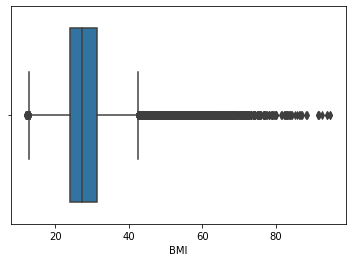

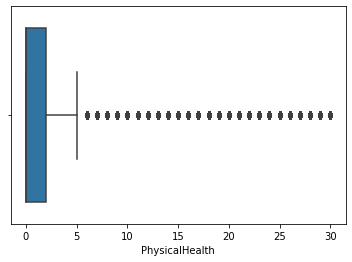

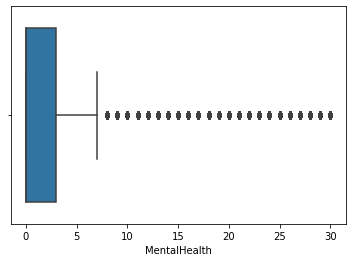

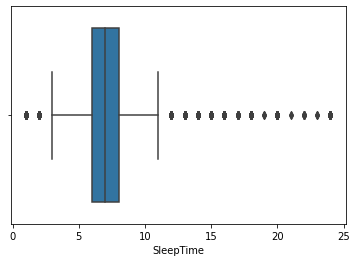

In [18]:
# Exploring looking for outliers
for i in numeric.columns:
    sns.boxplot(x=numeric[i])
    plt.show()
plt.show()

### Outcome

BMI: After checking with external source we belive that the outliers detected by the graph are not errors in the database but correct data. We have decided to mantian those cases inside the information.

Physical and Mental Health: We understand that the datapoints detected as outliers are not errors in the data, but the result of the way the question to fill out this variable is perform, this are cases of people that have been ill in the last month. We decided to keep the outliers in the data. 

Sleeptime: We proceed to remove outliers to avoid a misleading representation of the underlying data and relationships. We had individuals with average sleeping time over 12 hrs. Removing them will decrease the error variance and improve the model accuracy.

In [19]:
gen_health = heart_database['GenHealth'].value_counts()
sleep_time = heart_database['SleepTime'].value_counts().iloc[:5]

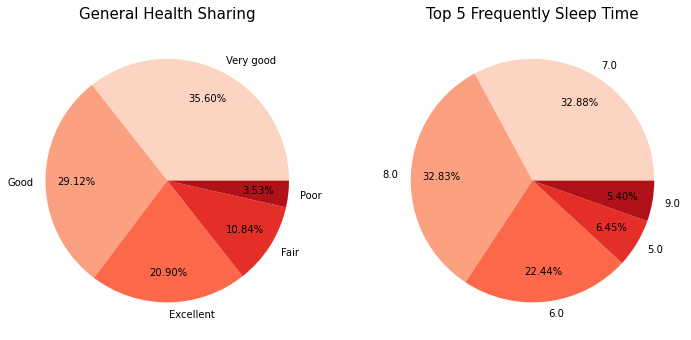

In [20]:
# Descriptives of General Health Sharing and Frequency of Sleep Time
fig, axes = plt.subplots(1, 2, figsize=(12, 9))
color = sns.color_palette('Reds', 5)
x_axes = [gen_health, sleep_time]

for i, ax in enumerate(axes):
    ax.pie(x=x_axes[i].values, labels=x_axes[i].index, autopct='%.2f%%', colors=color, pctdistance=.75)
axes[0].set_title('General Health Sharing', fontsize=15, pad=10)
axes[1].set_title('Top 5 Frequently Sleep Time', fontsize=15, pad=10)

plt.savefig("./Resources/Images/General_Health_Sharing_Frequently_Sleep_Time.png")
plt.show()

Outcome:

These Pie Graphs show us the percentage composition for two main categories: General Health Sharing and Frequently Sleep Time. In the case of General Health Sharing a 14.37% was concentrated for Poor and Fair levels, while the remaining percentages was concentrated for Good, Very Good, and Excellent. 
In the case for Frequently Sleep Time we found that more than a 60% of the persons included in the study rest less than 8 hrs.


## 5-1<span style='color:#0386f7de'>|</span>Descriptives of BMI, Physical Health, Mental Health, Sleeptime, and Heart Disease by Sex</b>

In [21]:
# Descriptive statistics BMI by sex
heart_database["BMI"].groupby(heart_database['Sex']).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,167805.0,28.162436,6.841990,12.02,23.30,26.75,31.62,94.66
Male,151990.0,28.505317,5.767018,12.02,24.63,27.50,31.32,94.85


In [22]:
# Descriptive statistics Physical Health by sex
heart_database["PhysicalHealth"].groupby(heart_database['Sex']).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,167805.0,3.681225,8.184823,0.0,0.0,0.0,2.0,30.0
Male,151990.0,3.029989,7.669794,0.0,0.0,0.0,1.0,30.0


In [23]:
# Descriptive statistics of Mental Health by sex
df = heart_database["MentalHealth"].groupby(heart_database['Sex']).describe()

In [24]:
# Descriptive statistics SleepTime by sex
heart_database["SleepTime"].groupby(heart_database['Sex']).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,167805.0,7.118536,1.452643,1.0,6.0,7.0,8.0,24.0
Male,151990.0,7.073380,1.417041,1.0,6.0,7.0,8.0,24.0


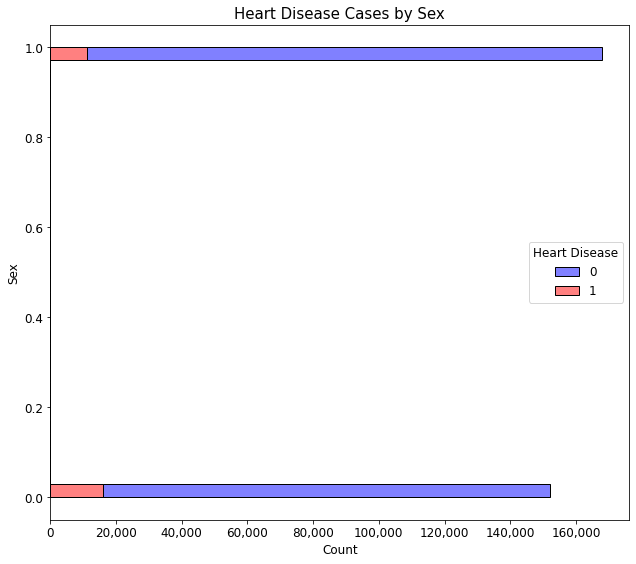

In [60]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.histplot(data=heart_database, y='Sex', hue='HeartDisease', multiple='stack', palette='seismic')

ax.set_title('Heart Disease Cases by Sex', fontsize=15)
ax.set_ylabel('Sex', fontdict={'fontsize': 12})
ax.set_xlabel('Count', fontdict={'fontsize': 12})
ax.xaxis.set_major_formatter(lambda x, pos: format(int(x), ','))
ax.get_legend().set_title('Heart Disease')

plt.savefig("./Resources/Images/Heart_Disease_Cases_Sex.png")
plt.show()

Outcome:

In this graph we can confirm that Males have a higher propensity of developing a Heart Disease compare with Females. 

# 5-2<span style='color:#0386f7de'>|</span>Descriptives of BMI, Physical Health, Mental Health, Sleeptime, and Heart Disease by Age Category</b>

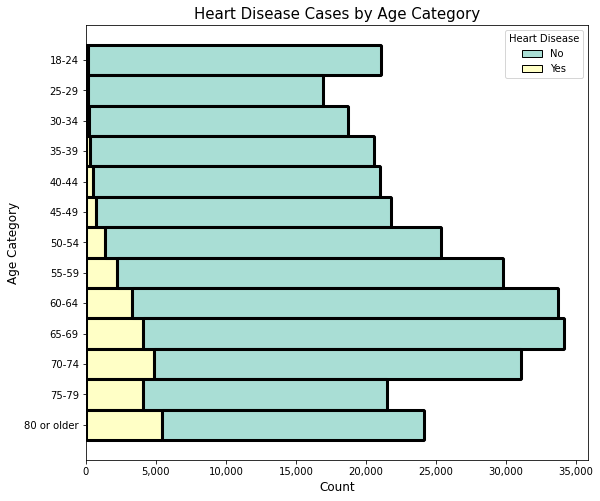

In [26]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.histplot(data=heart_database, y='AgeCategory', hue='HeartDisease', multiple='stack', palette='Set3')

ax.set_title('Heart Disease Cases by Age Category', fontsize=15)
ax.set_ylabel('Age Category', fontdict={'fontsize': 12})
ax.set_xlabel('Count', fontdict={'fontsize': 12})
ax.xaxis.set_major_formatter(lambda x, pos: format(int(x), ','))
ax.get_legend().set_title('Heart Disease')

plt.savefig("./Resources/Images/Heart_Disease_Cases_Age_Category.png")
plt.show()

Outcome:
    
This Bar Graph shows the Age Category among different participants, the highest group of participants are from ages from 60-64 and 65-69.
In this Graph we can confirm what age group is heart disease most common. As we can visualize adults age 65 and older are more likely than younger people to suffer from cardiovascular disease.

In [27]:
# Descriptive statistics of BMI
heart_database["BMI"].groupby(heart_database['AgeCategory']).describe()

,count,mean,std,min,25%,50%,75%,max
AgeCategory,,,,,,,,
18-24,21064.0,25.762770,6.022755,12.02,21.70,24.39,28.3700,83.33
25-29,16955.0,27.688610,6.647318,12.85,23.03,26.39,30.9000,85.91
30-34,18753.0,28.440007,6.847860,12.08,23.73,27.12,31.5700,87.05
35-39,20550.0,28.838634,6.864525,12.16,24.21,27.44,32.1100,94.85
40-44,21006.0,29.199764,6.891979,12.40,24.41,27.98,32.4900,91.55
45-49,21791.0,29.487189,6.835868,12.88,24.85,28.25,32.8900,82.50
50-54,25382.0,29.425097,6.681381,12.26,24.96,28.32,32.7675,94.66
55-59,29757.0,29.098977,6.473161,12.02,24.80,28.13,32.2800,91.55
60-64,33686.0,28.821778,6.262162,12.13,24.41,27.89,32.0100,84.44


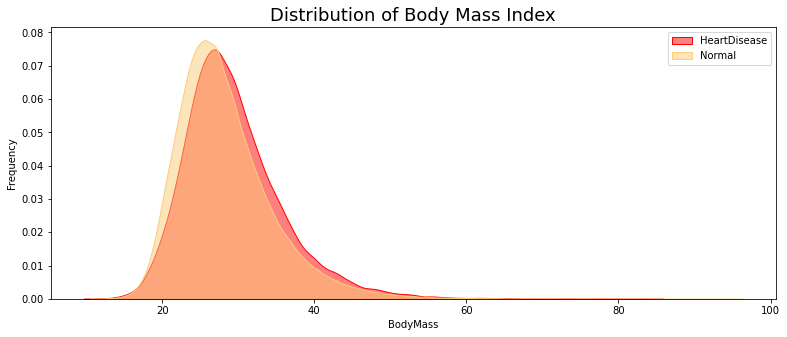

In [28]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_database[heart_database["HeartDisease"]=='Yes']["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heart_database[heart_database["HeartDisease"]=='No']["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.savefig("./Resources/Images/BMI_Distribution.png")
plt.show()

<p align = "left">
<img src ="https://github.com/ivn-m/predicting_heartdisease/blob/c7ced3dbba73b96b0751c859765b386e79886994/Resources/Images/image.png?raw=true"/>

Outcome:

The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres. Higher BMI has a stronger association with incident heart failure.

We can confirm that that the population that suffer a heartdisiease have on average a higher BMI, which means that there is a positive correlation between the high BMI and the risk of heart disiease.

In [29]:
# Descriptive statistics Physical Health by sex
heart_database["PhysicalHealth"].groupby(heart_database['AgeCategory']).describe()

,count,mean,std,min,25%,50%,75%,max
AgeCategory,,,,,,,,
18-24,21064.0,1.698965,4.793995,0.0,0.0,0.0,1.0,30.0
25-29,16955.0,1.802241,5.211307,0.0,0.0,0.0,1.0,30.0
30-34,18753.0,2.018344,5.680184,0.0,0.0,0.0,1.0,30.0
35-39,20550.0,2.241606,6.098385,0.0,0.0,0.0,1.0,30.0
40-44,21006.0,2.574836,6.761034,0.0,0.0,0.0,1.0,30.0
45-49,21791.0,3.020834,7.450552,0.0,0.0,0.0,1.0,30.0
50-54,25382.0,3.607596,8.228561,0.0,0.0,0.0,2.0,30.0
55-59,29757.0,4.027422,8.707722,0.0,0.0,0.0,2.0,30.0
60-64,33686.0,4.317728,9.099901,0.0,0.0,0.0,2.0,30.0


In [30]:
# Descriptive statistics of Mental Health by AgeCategory
heart_database["MentalHealth"].groupby(heart_database['AgeCategory']).describe()

,count,mean,std,min,25%,50%,75%,max
AgeCategory,,,,,,,,
18-24,21064.0,6.152535,8.700449,0.0,0.0,2.0,10.0,30.0
25-29,16955.0,5.729106,8.693158,0.0,0.0,1.0,7.0,30.0
30-34,18753.0,5.292540,8.590964,0.0,0.0,0.0,7.0,30.0
35-39,20550.0,5.049781,8.651773,0.0,0.0,0.0,5.0,30.0
40-44,21006.0,4.675188,8.542309,0.0,0.0,0.0,5.0,30.0
45-49,21791.0,4.385710,8.307699,0.0,0.0,0.0,5.0,30.0
50-54,25382.0,4.321763,8.481494,0.0,0.0,0.0,4.0,30.0
55-59,29757.0,4.055953,8.287960,0.0,0.0,0.0,3.0,30.0
60-64,33686.0,3.550555,7.871680,0.0,0.0,0.0,2.0,30.0


In [31]:
# Descriptive statistics SleepTime by AgeCategory
heart_database["SleepTime"].groupby(heart_database['AgeCategory']).describe()

,count,mean,std,min,25%,50%,75%,max
AgeCategory,,,,,,,,
18-24,21064.0,7.186432,1.428225,1.0,6.0,7.0,8.0,24.0
25-29,16955.0,6.986435,1.359409,1.0,6.0,7.0,8.0,24.0
30-34,18753.0,6.872660,1.335672,1.0,6.0,7.0,8.0,24.0
35-39,20550.0,6.854939,1.363130,1.0,6.0,7.0,8.0,24.0
40-44,21006.0,6.876940,1.356250,1.0,6.0,7.0,8.0,20.0
45-49,21791.0,6.904043,1.378228,1.0,6.0,7.0,8.0,24.0
50-54,25382.0,6.924159,1.423170,1.0,6.0,7.0,8.0,24.0
55-59,29757.0,6.965487,1.439668,1.0,6.0,7.0,8.0,24.0
60-64,33686.0,7.059105,1.448716,1.0,6.0,7.0,8.0,24.0


## <b> 6<span style='color:#0386f7de'>|</span>Analysis of Non-Numeric Variables</b>

In [32]:
non_numeric_a = heart_database.select_dtypes(exclude='float64')
non_numeric = non_numeric_a.select_dtypes(exclude='category')

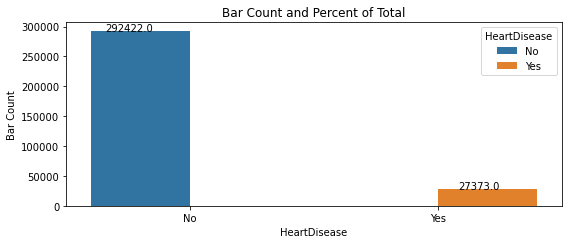

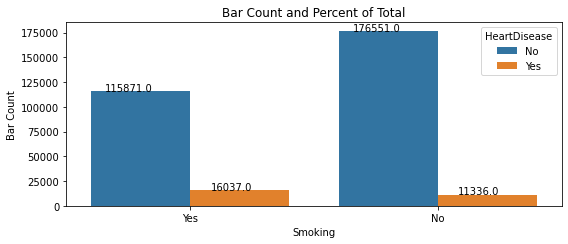

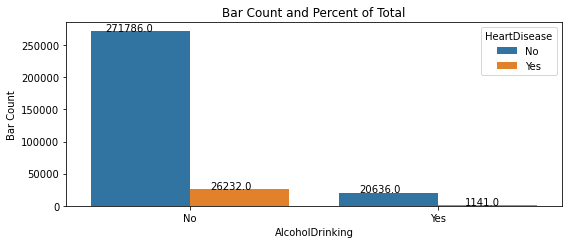

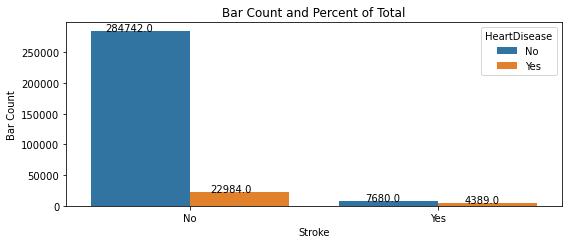

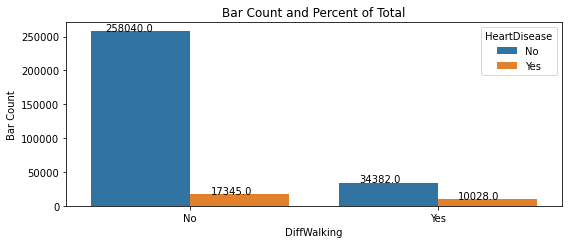

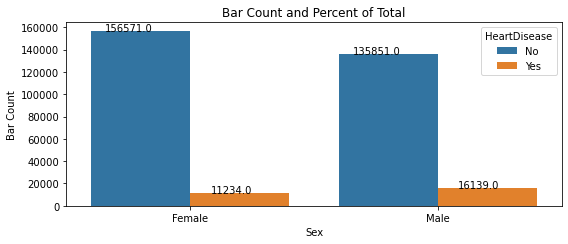

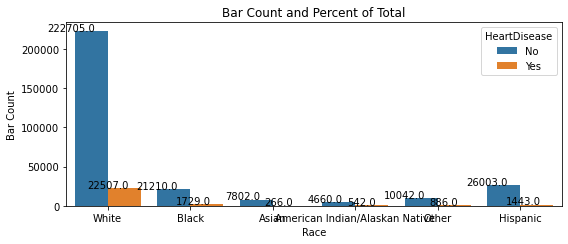

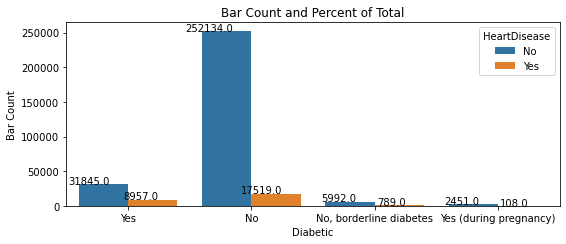

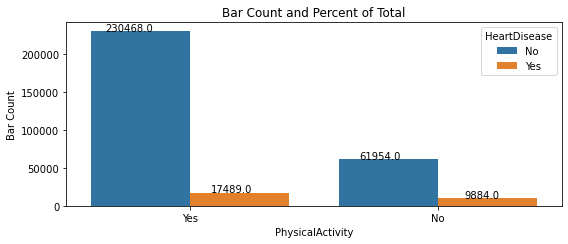

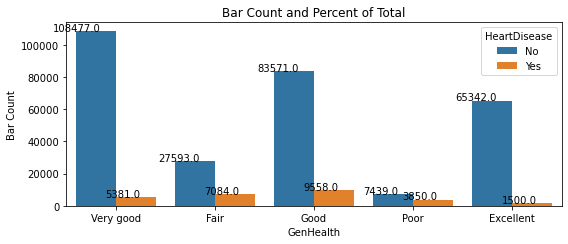

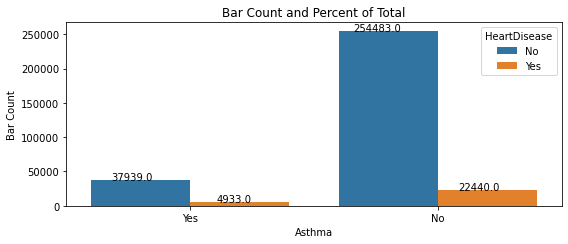

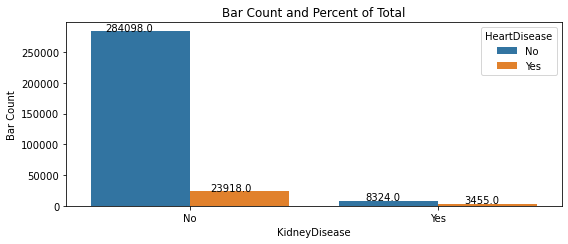

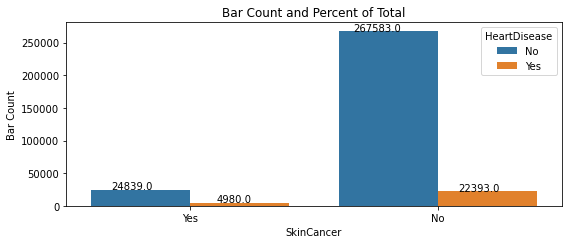

In [33]:
# Creating the Chart
for i in non_numeric.columns:
    plt.rcParams["figure.figsize"] = [8.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    ax = sns.countplot(x = non_numeric[i],data = non_numeric,hue ='HeartDisease')
    ax.set(ylabel='Bar Count', title='Bar Count and Percent of Total')

    # Seeting up % on the graphs
    for p in ax.patches:
        percentage = '{:.1f}' .format(p.get_height())
        x = p.get_x() -0.15 + p.get_width()
        y = p.get_height()
        ax.annotate(percentage , (x, y),ha='right')
    plt.show()

# <b>7<span style='color:#0386f7de'>|</span>Heat Map Correlation Factors Between variables </b>

In [34]:
heart_database_cat = heart_database

In [35]:
# #Replacing binary data types for correlation analysis

heart_database_cat['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)
heart_database_cat['Smoking'].replace({'No':0,'Yes':1}, inplace=True)
heart_database_cat['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)
heart_database_cat['Stroke'].replace({'No':0,'Yes':1}, inplace=True)
heart_database_cat['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)
heart_database_cat['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)
heart_database_cat['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)
heart_database_cat['Asthma'].replace({'No':0,'Yes':1}, inplace=True)
heart_database_cat['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)
heart_database_cat['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)
heart_database_cat['Sex'].replace({'Male':0,'Female':1}, inplace=True)
heart_database_cat['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)
heart_database_cat['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)
heart_database_cat['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

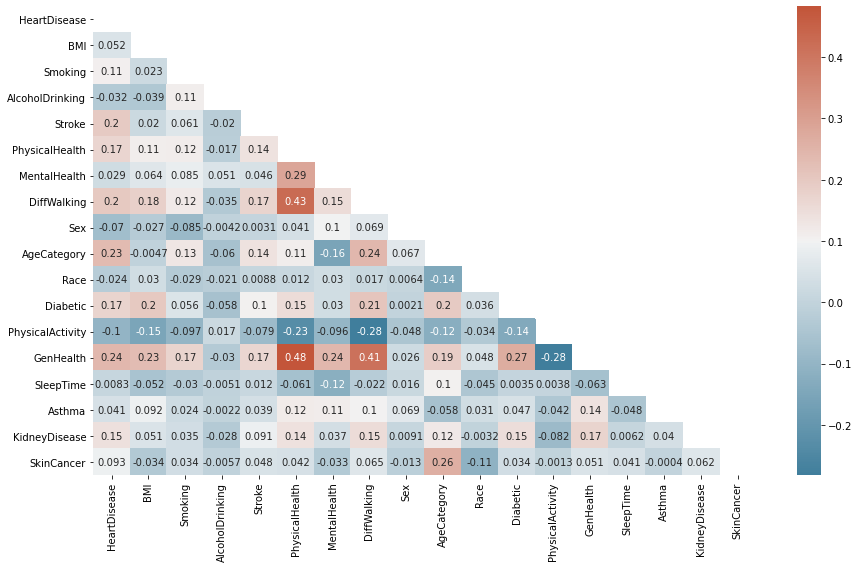

In [36]:
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(heart_database_cat.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(heart_database_cat.corr(), mask=mask, cmap=cmap, annot=True)
plt.savefig("./Resources/Images/Heat_Map.png")
plt.show()

Outcome:
    
The Heat Map show us the correlation between two variables. If the value is 1, it is said to be a positive correlation between the two variables. 
Regarding the correlation factor against the HeartDisease Variable, we notice as the variables with higher correlation the one listed below:
- GeneralHelath
- Age
- Stroke
- DiffWaking

Some other variables have small or even be negative correlation (PhysicalActivity), and we would consider if we have to use them on the model.

# <b>8<span style='color:#0386f7de'>|</span> ML Data Preprocessing</b>


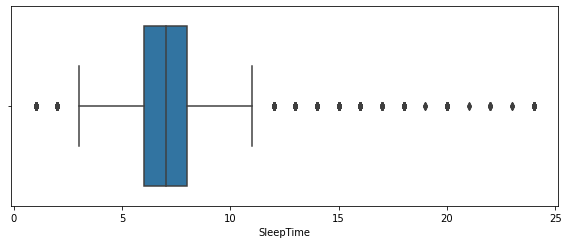

In [37]:
# Read Sleeptime to find Outliers
sns.boxplot(heart_database["SleepTime"])
plt.savefig("./Resources/Images/Sleeptime_whole.png")
plt.show()

In [38]:
# Define Quartiles
Q1 = heart_database["SleepTime"].quantile(0.25)
Q3 = heart_database["SleepTime"].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# print(lower_limit)
# print(upper_limit)

In [39]:
new_sleeptime = heart_database[(heart_database['SleepTime'] <= upper_limit) & (heart_database['SleepTime'] >= lower_limit)]
# new_sleeptime.describe()

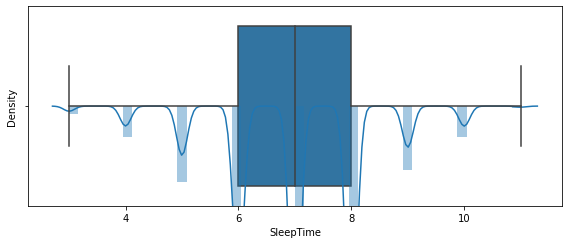

In [40]:
# Generate New Plot
sns.distplot(new_sleeptime['SleepTime'])
sns.boxplot(new_sleeptime['SleepTime'])
plt.savefig("./Resources/Images/Sleeptime_Clean.png")
plt.show()

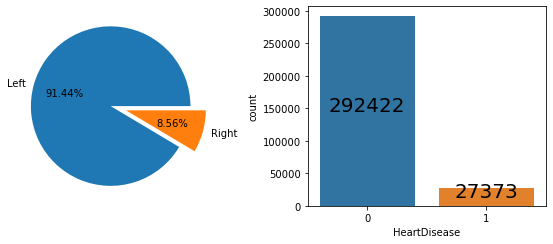

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(121)
plt.pie(x = heart_database.groupby(['HeartDisease']).HeartDisease.count().to_list(),
        labels = ["Left", "Right"], autopct='%1.2f%%', explode = (0, 0.2))

plt.subplot(122)
sns.countplot(data = heart_database, x = 'HeartDisease')
zero, one = heart_database.HeartDisease.value_counts()
plt.text(0, zero//2, zero, fontsize = 20,  horizontalalignment='center')
plt.text(1, one//2, one, fontsize = 20, horizontalalignment='center')
plt.savefig("./Resources/Images/Confirming_Imbalance.png")

Outcome:

After importing dependencies, an unbalanced dataset with two classes is artificially created and plotted, as shown in the resulting charts.

In [42]:
# Standarize and encode the data in order to be ready for building up the Training and testing data sets.

In [43]:
heart_database=pd.get_dummies(heart_database, drop_first=True)

In [44]:
X=heart_database.drop(['HeartDisease'],axis=1)
y=heart_database['HeartDisease']

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=(scaler.fit_transform(X))

In [46]:
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# summarize class distribution
print(Counter(y))
# define resampling
over = RandomOverSampler(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.7)
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under)])
X, y = pipeline.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

Counter({0: 292422, 1: 27373})
Counter({0: 125322, 1: 87726})


# <b>9<span style='color:#0386f7de'>|</span> Split Dataset for Training and Testing</b>

In [47]:
# Split the dataset in training and testing to perform then Maching learning process.
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Confusion Matrix

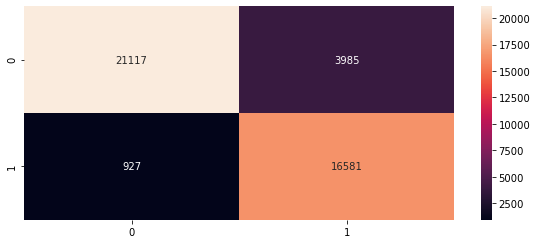

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(random_state=1000)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_dt)
sns.heatmap(cm, annot=True, fmt="d")
# save the image
plt.savefig("./Resources/Images/Confusion_matrix.png")

In [49]:
print('accuracy',accuracy_score((y_test), y_predict_dt))
print('precision',precision_score(y_test, y_predict_dt))
print('recall',recall_score(y_test, y_predict_dt))

accuracy 0.8847218962684815
precision 0.8062335894194301
recall 0.9470527758738863


## Logistic Regresion

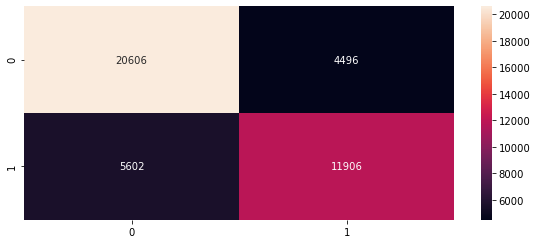

In [50]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_lr)
sns.heatmap(cm, annot=True, fmt="d")
plt.savefig("./Resources/Images/Logistic_Regresion.png")

In [51]:
print('accuracy',accuracy_score((y_test), y_predict_lr))
print('precision',precision_score(y_test, y_predict_lr))
print('recall',recall_score(y_test, y_predict_lr))

accuracy 0.7630133771415161
precision 0.725887086940617
recall 0.6800319853781128


## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

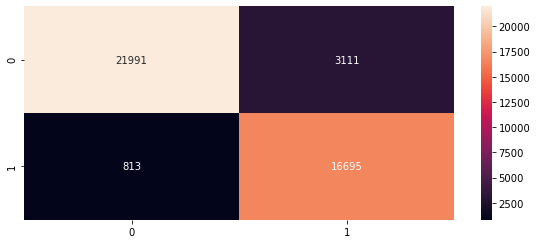

In [53]:
rf =RandomForestClassifier(random_state=1000) 
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d")
plt.savefig("./Resources/Images/Random_Forest_Classifier.png")

In [54]:
print('accuracy',accuracy_score((y_test), y_predict_rf))
print('precision',precision_score(y_test, y_predict_rf))
print('recall',recall_score(y_test, y_predict_rf))

accuracy 0.9079089415630134
precision 0.8429263859436534
recall 0.953564084989719


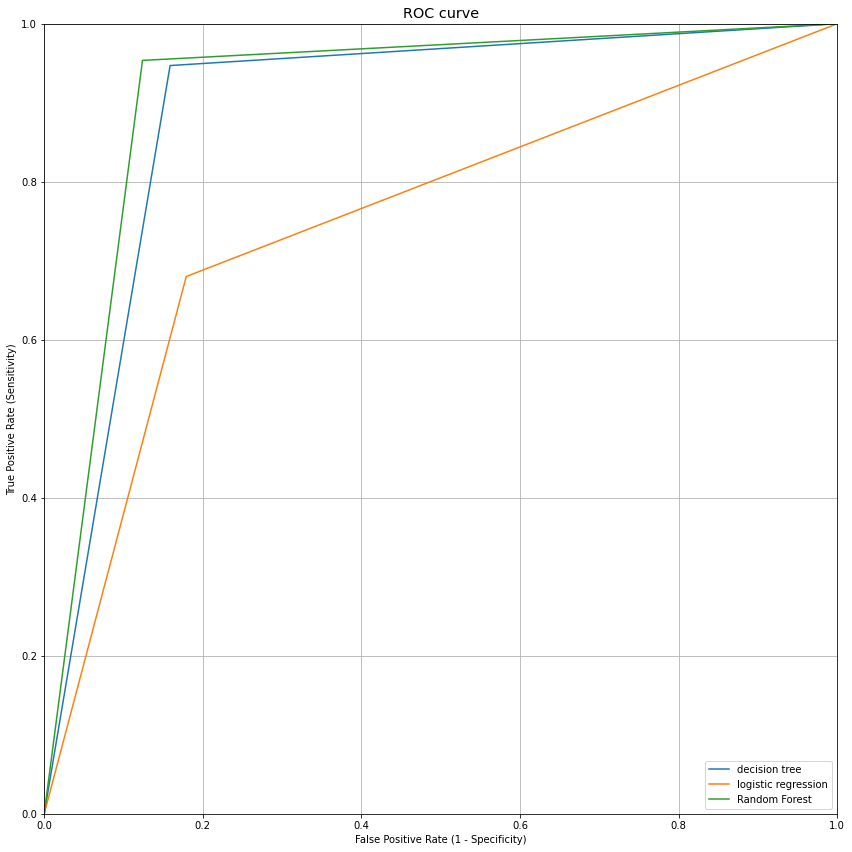

In [55]:
from sklearn import metrics

fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_predict_dt)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_predict_lr)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_predict_rf)
plt.figure(figsize=(12,12))
plt.plot(fpr_dt, tpr_dt, label="decision tree")
plt.plot(fpr_lr, tpr_lr, label="logistic regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.savefig("./Resources/Images/ROC_Charts_Models.png")

# <b>10<span style='color:#0386f7de'>|</span> Modeling</b>

In [56]:
# We are going to perform a Classifier Analysis and a Tree decission Model to evaluate the best model to predict the heart dissiesa variable.

# Logistic Regresion 

# <b>11<span style='color:#0386f7de'>|</span> Modeling Comparison and Conclusions</b>

In [57]:
# We are going to compare the model built in 9 to reach the conclusions. 

## Evaluating the Model

# <b>XX<span style='color:#0386f7de'>|</span> Codes to be deleted </b>

In [58]:
# <b>4<span style='color:#0386f7de'>|</span> Preliminary Data Munging </b>

# # Changing AgeCategory as category => This is still in the code!!!
## heart_database["AgeCategory"]=heart_database["AgeCategory"].astype("category")

# # Assigning enconeded variable to AgeCategory using cat.codes
# heart_database["AgeCategory_cat"] = heart_database["AgeCategory"].cat.codes

# #changing variable to category
# heart_database["AgeCategory_cat"]=heart_database["AgeCategory_cat"].astype("category")
# #heart_database.head(10)
# # Changing Diabetes as category
# heart_database["Diabetic"]=heart_database["Diabetic"].astype("category")

# # Assigning enconeded variable to AgeCategory using cat.codes
# heart_database["Diabetic_cat"] = heart_database["Diabetic"].cat.codes

# #changing variable to category
# heart_database["Diabetic_cat"]=heart_database["Diabetic_cat"].astype("category")

# #heart_database.head(10)
# # Changing Race as category
# heart_database["Race"]=heart_database["Race"].astype("category")

# # Assigning enconeded variable to AgeCategory using cat.codes
# heart_database["Race_cat"] = heart_database["Race"].cat.codes

# #changing variable to category
# heart_database["Race_cat"]=heart_database["Race_cat"].astype("category")

# #heart_database.head(10)
# # Changing GenHealth as category
# heart_database["GenHealth"]=heart_database["GenHealth"].astype("category")

# # Assigning enconeded variable to GenHealth using cat.codes
# heart_database["GenHealth_cat"] = heart_database["GenHealth"].cat.codes

# #changing variable to category
# heart_database["GenHealth_cat"]=heart_database["GenHealth_cat"].astype("category")

# #heart_database.head(10)
# #Replacing binary data types

# heart_database['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['Smoking'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['Stroke'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)
# heart_database['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['Asthma'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['Sex'].replace({'Male':0,'Female':1}, inplace=True)
# heart_database['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)
# heart_database['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)
# heart_database['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)
# We'll utilize OneHotEncoder in the preprocessing stage later for some variables that have more than two unique values.

In [59]:
# # Age distribution => deleted because it was repeted

# fig, ax = plt.subplots(figsize=(9, 8))
# sns.histplot(data=heart_database, y='AgeCategory', palette='blue')

# ax.set_title('Age Category Distribution', fontsize=15)
# ax.set_ylabel('Age Category', fontdict={'fontsize': 12})
# ax.set_xlabel('Count', fontdict={'fontsize': 12})
# ax.xaxis.set_major_formatter(lambda x, pos: format(int(x), ','))

# plt.show()

# #labels=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']
# #ax.set_yticklabels(labels)